In [74]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(precision=5, suppress=True, linewidth=150)


fea_arrays = np.load('fea_arrays.npz')
K=fea_arrays['K']
K

array([[ 0.00417,  0.00144, -0.00083, -0.00144, -0.00333,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.00144,  0.0025 , -0.00144, -0.0025 ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [-0.00083, -0.00144,  0.005  ,  0.     , -0.00083,  0.00144, -0.00333,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [-0.00144, -0.0025 ,  0.     ,  0.005  ,  0.00144, -0.0025 ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [-0.00333,  0.     , -0.00083,  0.00144,  0.00833,  0.     , -0.00083, -0.00144, -0.00333,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.00144, -0.0025 ,  0.     ,  0.005  , -0.00144, -0.0025 ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , -0.00333,  0.     , -0.00083, -0.00144,  0.00833,  0.     , -0.00083,  0.00144

Q 1

In [2]:
condk = np.linalg.cond(K)
condk213 = np.linalg.cond(K[2:13])

In [3]:
condk213

28.4441596136595

In [4]:
condk

1.4577532625238035e+17

In [5]:
eps_float64 = np.finfo(np.float64).eps
eps_float64
# t = 16
# error = 10^(c-t)
# ck = 17
# ck213 = 1

2.220446049250313e-16

In [6]:
error213 = 10**(1-16)
error213

1e-15

In [7]:
# Q1 a
errork = 10**(17-16)
errork

10

In [8]:
print(np.linalg.cond(K))
print(np.linalg.cond(K[2:13,2:13]))

print('expected error in x=solve(K,b) is {}'.format(10**(16-16)))
print('expected error in x=solve(K[2:13,2:13],b) is {}'.format(10**(2-16)))

1.4577532625238035e+17
52.23542514351006
expected error in x=solve(K,b) is 1
expected error in x=solve(K[2:13,2:13],b) is 1e-14


In [44]:
from scipy.linalg import lu

P,L,U = lu(K[2:13,2:13])

LU = L@U
LU

array([[ 0.005  ,  0.     , -0.00083,  0.00144, -0.00333,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.005  ,  0.00144, -0.0025 ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [-0.00083,  0.00144,  0.00833,  0.     , -0.00083, -0.00144, -0.00333,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.00144, -0.0025 ,  0.     ,  0.005  , -0.00144, -0.0025 ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [-0.00333,  0.     , -0.00083, -0.00144,  0.00833,  0.     , -0.00083,  0.00144, -0.00333,  0.     ,  0.     ],
       [ 0.     ,  0.     , -0.00144, -0.0025 , -0.     ,  0.005  ,  0.00144, -0.0025 ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , -0.00333, -0.     , -0.00083,  0.00144,  0.00833,  0.     , -0.00083, -0.00144, -0.00333],
       [ 0.     ,  0.     ,  0.     ,  0.     ,  0.00144, -0.0025 ,  0.     ,  0.005  , -0.00144, -0.0025 ,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  0.     , 

In [10]:
def solveLU(L,U,b):
    '''solveLU: solve for x when LUx = b
    x = solveLU(L,U,b): solves for x given the lower and upper 
    triangular matrix storage
    uses forward substitution for 
    1. Ly = b
    then backward substitution for
    2. Ux = y
    
    Arguments:
    ----------
    L = Lower triangular matrix
    U = Upper triangular matrix
    b = output vector
    
    returns:
    ---------
    x = solution of LUx=b '''
    n=len(b)
    x=np.zeros(n)
    y=np.zeros(n)
        
    # forward substitution
    for k in range(0,n):
        y[k] = b[k] - L[k,0:k]@y[0:k]
    # backward substitution
    for k in range(n-1,-1,-1):
        x[k] = (y[k] - U[k,k+1:n]@x[k+1:n])/U[k,k]
    return x

In [66]:
us = np.zeros(14)
ua = np.zeros(14)
us[2:13] = solveLU(L,U,Ff/((200e3)*0.1))
ua[2:13] = solveLU(L,U,Ff/((70e3)*0.1))

Fs=200e3*0.1*K@us
Fa=70e3*0.1*K@ua

print(us[2:13])
print(ua[2:13])

[  5.84567  -6.375     1.29904 -12.        3.2476  -16.125     5.19615 -12.        0.64952  -6.375     6.49519]
[ 16.70192 -18.21429   3.71154 -34.28571   9.27884 -46.07143  14.84615 -34.28571   1.85577 -18.21429  18.55769]


In [59]:
Ff=np.zeros(11)
Ff[5]=-300
print(Ff)

[   0.    0.    0.    0.    0. -300.    0.    0.    0.    0.    0.]


In [69]:
l=300 # mm
nodes = np.array([[1,0,0],[2,0.5,3**0.5/2],[3,1,0],[4,1.5,3**0.5/2],[5,2,0],[6,2.5,3**0.5/2],[7,3,0]])
nodes[:,1:3]*=l
elems = np.array([[1,1,2],[2,2,3],[3,1,3],[4,2,4],[5,3,4],[6,3,5],[7,4,5],[8,4,6],[9,5,6],[10,5,7],[11,6,7]])

ix = 2*np.block([[np.arange(0,5)],[np.arange(1,6)],[np.arange(2,7)],[np.arange(0,5)]])
iy = ix+1

r = np.block([n[1:3] for n in nodes])
print(r)

[  0.        0.      150.      259.80762 300.        0.      450.      259.80762 600.        0.      750.      259.80762 900.        0.     ]


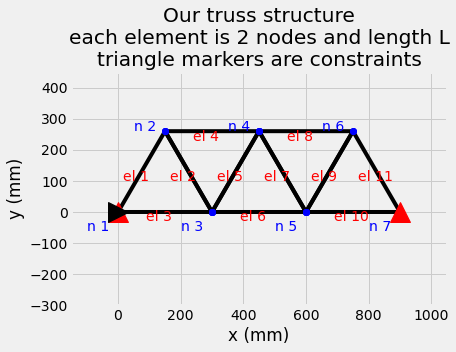

In [20]:
plt.plot(r[ix],r[iy],'-',color='k')
plt.plot(r[ix],r[iy],'o',color='b')
plt.plot(r[0],r[1],'^',color='r',markersize=20)
plt.plot(r[0],r[1],'>',color='k',markersize=20)
plt.plot(r[-2],r[-1],'^',color='r',markersize=20)
# label the nodes
for n in nodes:
    if n[2]>0.8*l: offset=0.1
    else: offset=-l/5
    plt.text(n[1]-l/3,n[2]+offset,'n {}'.format(int(n[0])),color='b')
# label the elements
for e in elems:
    n1=nodes[e[1]-1]
    n2=nodes[e[2]-1]
    x=np.mean([n2[1],n1[1]])
    y=np.mean([n2[2],n1[2]])
    # ----------------->need elem labels<-----------------
    plt.text(x-l/5,y-l/10,'el {}'.format(int(e[0])),color='r')
plt.title('Our truss structure\neach element is 2 nodes and length L\ntriangle markers are constraints')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.axis(l*np.array([-0.5,3.5,-1,1.5]));

In [21]:
print(ua)

[-3.72107e+16  3.47142e+16 -3.16800e+16  3.15211e+16 -3.72107e+16  2.83279e+16 -3.16800e+16  2.51348e+16 -3.72107e+16  2.19416e+16 -3.16800e+16
  1.87484e+16 -3.72107e+16  1.55553e+16]


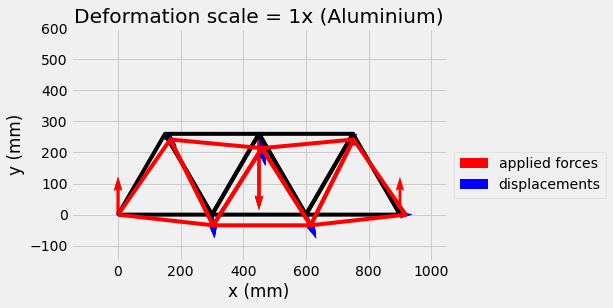

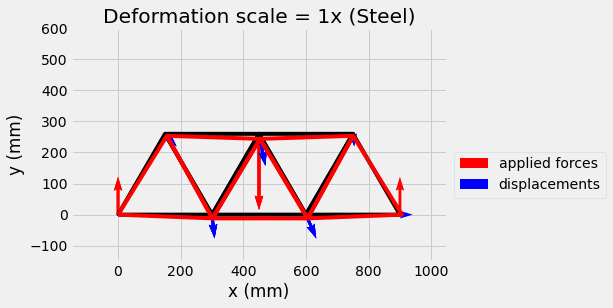

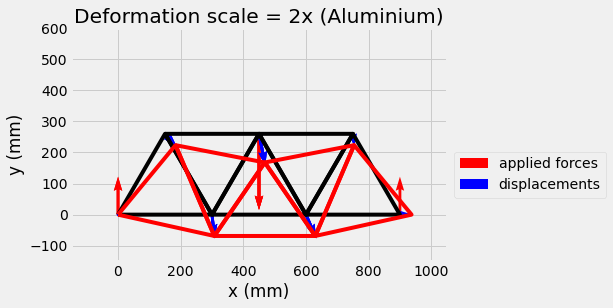

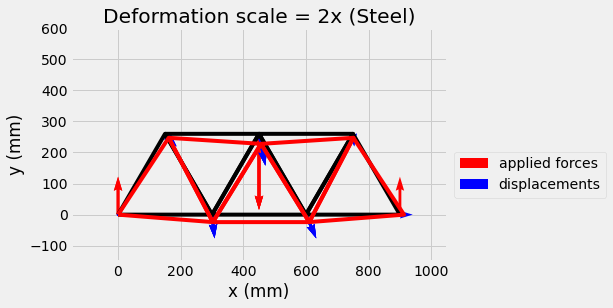

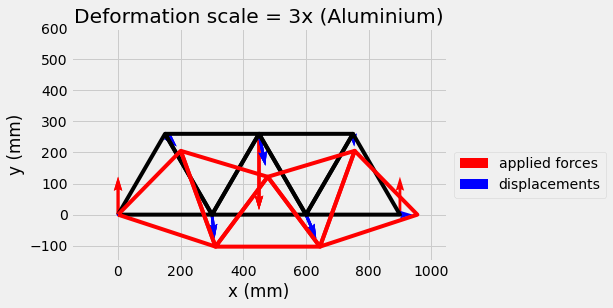

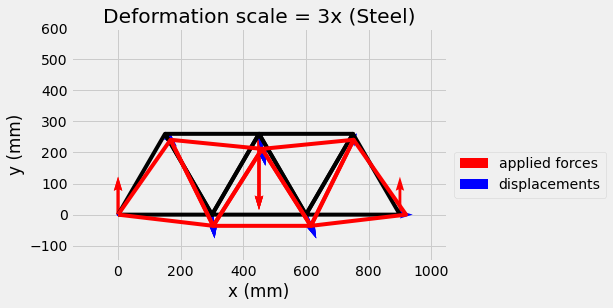

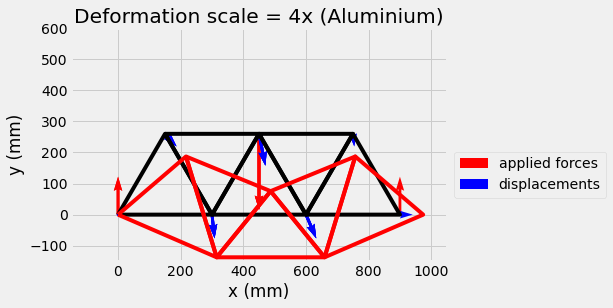

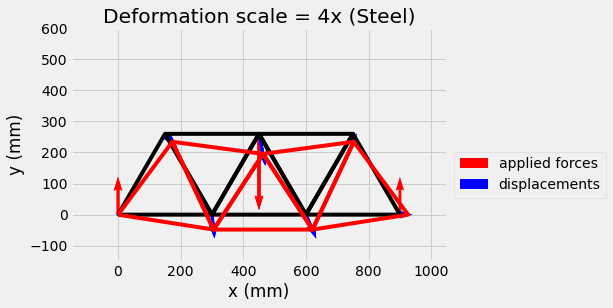

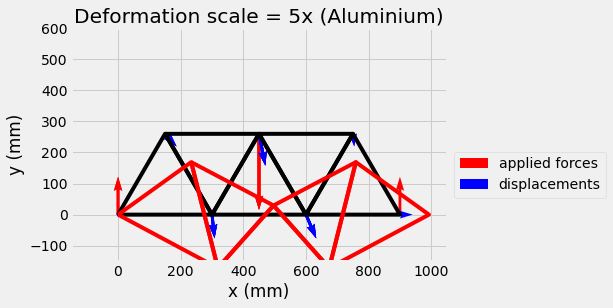

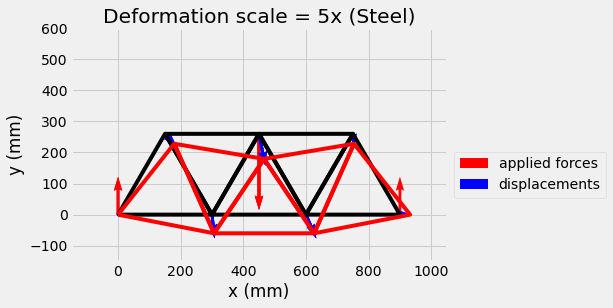

In [67]:
f = [Fa,Fs]
u = [ua,us]
t = ['Aluminium', 'Steel']
for s in range(1,6):
    for i in range(2):
        plt.figure()
        plt.plot(r[ix],r[iy],'-',color=(0,0,0,1))
        plt.plot(r[ix]+u[i][ix]*s,r[iy]+u[i][iy]*s,'-',color=(1,0,0,1))
        plt.quiver(r[ix],r[iy],f[i][ix],f[i][iy],color=(1,0,0,1),label='applied forces')
        plt.quiver(r[ix],r[iy],u[i][ix],u[i][iy],color=(0,0,1,1),label='displacements')
        plt.axis(l*np.array([-0.5,3.5,-0.5,2]))
        plt.xlabel('x (mm)')
        plt.ylabel('y (mm)')
        plt.title(f'Deformation scale = {s}x ({t[i]})');
        plt.legend(bbox_to_anchor=(1,0.5));

In [23]:
r[iy]

array([[  0.     , 259.80762,   0.     , 259.80762,   0.     ],
       [259.80762,   0.     , 259.80762,   0.     , 259.80762],
       [  0.     , 259.80762,   0.     , 259.80762,   0.     ],
       [  0.     , 259.80762,   0.     , 259.80762,   0.     ]])

In [24]:
np.max(abs(ua[iy]))

3.4714225046867624e+16

In [25]:
np.max(abs(us[iy]))

1.2149978766403656e+16

Q 3
a. Using aluminum, what is the minimum cross-sectional area to keep total y-deflections <0.2mm
?

b. Using steel, what is the minimum cross-sectional area to keep total y-deflections <0.2mm
?

c. What are the weights of the aluminum and steel trusses with the chosen cross-sectional areas?

In [70]:
Es = 200e3
As = 0.1
us2 = us
while np.max(abs(us2[iy])) > 0.2:
    ufs2 = np.linalg.solve(Es*As*K[2:13,2:13],Ff)
    us2=np.zeros(14)
    us2[2:13]=ufs2
    As += 0.01
Ea = 70e3
Aa = 0.1
ua2 = ua
while np.max(abs(ua2[iy])) > 0.2:
    ufa2 = np.linalg.solve(Ea*Aa*K[2:13,2:13],Ff)
    ua2=np.zeros(14)
    ua2[2:13]=ufa2
    Aa += 0.01

print(f'For a maximum y deflection of <0.2mm, CSAs of steel and aluminium respectively are {As:.2f} mm^2 and {Aa:.2f} mm^2')

For a maximum y deflection of <0.2mm, CSAs of steel and aluminium respectively are 8.08 mm^2 and 23.05 mm^2


In [71]:
# Total weight = 11*CSA*Length_of_truss*density
# Length of truss = 300mm
rho_al = 2.71e-6 # kg/mm^3
rho_st = 7.85e-6 # kg/mm^3

W_al = 11*Aa*300*2.71e-6
W_st = 11*As*300*7.85e-6

print(f'Total weight of steel is {W_st*1000:.2f} g, total weight of aluminium is {W_al*1000:.2f} g.')

Total weight of steel is 209.31 g, total weight of aluminium is 206.14 g.


In [72]:
print(np.max(abs(ua2[iy])))

0.19996279761904054


In [73]:
print(np.max(abs(us2[iy])))

0.19981412639405519
